I've been told I have an old soul. Maybe it's that I go to bed at 9 pm and wake up at 5am, or that I enjoy oatmeal. Maybe it's that my sense of humor has been described as "grandfatherly". But I attribute to the fact that I love old movies - if it has color or a clear picture, no thank you. Give me John Wayne, black and white, and lack of political correctness and I'm happy.

Naturally, I wanted my project to surround something I was interested in. I initially found a dataset of actors and their movies by year, which would be a great analysis but perhaps too tame for this project. I then started to search for full movie scripts for more of a challenge - scrape the text from a website, remove punctuation, etc. I wanted to compare two movie scripts - one from a while back (1953 was as far back as I could find) and another more recent movie. I landed on White Christmas and 10 Things I Hate About You. What can venctorizing these scripts tell us about the content of these movies? Let's see!

In [1]:
# import libraries
import numpy as np
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# get the data
tenthings = open('tenthings.txt', 'r')
white = open('whitexmas.txt', 'r')

In [3]:
# document term matrices
# for tenthings
doc1 = {}
for line in tenthings:
    for word in line.split():
        if word in doc1.keys():
            doc1[word] += 1 
        else:
            doc1[word] = 1

# for whitexmas
doc2 = {}
for line in white:
    for word in line.split():
        if word in doc2.keys():
            doc2[word] += 1 
        else:
            doc2[word] = 1

doc1; doc2

{'"WHITE': 1,
 'CHRISTMAS"': 1,
 'by': 39,
 'Melvin': 1,
 'Frank,': 1,
 'Norman': 2,
 'Krasna': 1,
 'and': 338,
 'Panama': 1,
 'FULL': 28,
 'SHOT': 141,
 '-': 244,
 'REAR': 1,
 'AREA': 2,
 '(DAY)': 13,
 '(GLASS)': 1,
 'This': 27,
 'is': 254,
 'December': 1,
 '24,': 1,
 '1944,': 1,
 'in': 191,
 'the': 796,
 'first': 6,
 'safe': 1,
 'area': 3,
 'directly': 2,
 'behind': 9,
 'battle': 1,
 'line,': 1,
 'Italian': 1,
 'theatre.': 1,
 'In': 13,
 'distance': 4,
 'occasional': 1,
 'artillery': 2,
 'light': 4,
 'flashes': 2,
 'are': 117,
 'seen': 11,
 'rumbles': 1,
 'heard.': 2,
 'The': 148,
 'battered': 1,
 'terrain': 1,
 'shows': 5,
 'effects': 3,
 'of': 211,
 'battle.': 1,
 'foreground': 2,
 'a': 300,
 'recreation': 4,
 'area,': 1,
 'covered': 2,
 'with': 58,
 'camouflage;': 1,
 'entertainment': 2,
 'progress': 3,
 'on': 98,
 'raised': 1,
 'stage.': 5,
 'Men': 1,
 'division': 3,
 'seated': 3,
 'about': 32,
 'benches,': 1,
 'boxes,': 1,
 'ground.': 2,
 'A': 31,
 'camouflaged': 1,
 'motor': 1,

We can see that starting this way does not take into account caps and various punctuation - time to take care of that before we can truly vectorize the two documents!

In [4]:
# Read them in as one line before analyzing
with open('tenthings.txt', 'r') as file:
    ten = file.read()

with open('whitexmas.txt', 'r') as file:
    white = file.read()

After opening the files in a way that's more condusive to what needs to be done, we can remove punctuation, white space, turn all words lowercase, and then re-compute frequencies for each of the movie scripts.

In [5]:
def cleanPunctNotHyphen(doc):
    return re.sub(r'[",",".",":",";","'",'"']','', doc)

def tokenize(doc):
    # split on white space
    return doc.split()

def lowerCase(list):
    # lower case each word
    return [word.lower() for word in list]

def cleanUpSteps(doc):
    # call functions
    return lowerCase(tokenize(cleanPunctNotHyphen(doc)))

# apply to docs
ten_cleaned = cleanUpSteps(ten)
white_cleaned = cleanUpSteps(white)

Now that we've cleaned up the documents we can count more accurately.

Before moving on, we may want to remove stop words to more accurately assess the real words in these movies.

In [6]:
stopwords = set(stopwords.words('english'))

ten_filtered = [w for w in ten_cleaned if not w.lower() in stopwords]
ten_filtered = []
for w in ten_cleaned:
    if w not in stopwords:
        ten_filtered.append(w)

white_filtered = [w for w in white_cleaned if not w.lower() in stopwords]
white_filtered = []
for w in white_cleaned:
    if w not in stopwords:
        white_filtered.append(w)

In [7]:
ten_counts = Counter(ten_filtered)
white_counts = Counter(white_filtered)
ten_counts, white_counts

(Counter({'ten': 2,
          'things': 5,
          'hate': 18,
          'written': 1,
          'karen': 1,
          'mccullah': 1,
          'lutz': 1,
          '&': 1,
          'kirsten': 1,
          'smith': 1,
          'based': 1,
          'taming': 2,
          'shrew': 3,
          'william': 10,
          'shakespeare': 7,
          'revision': 1,
          'november': 1,
          '12': 1,
          '1997': 1,
          'padua': 6,
          'high': 10,
          'school': 27,
          '-': 136,
          'day': 70,
          'welcome': 2,
          'typical': 1,
          'urban-suburban': 1,
          'portland': 1,
          'oregon': 1,
          'smarties': 1,
          'skids': 1,
          'preppies': 1,
          'granolas': 1,
          'loners': 1,
          'lovers': 1,
          'crowd': 12,
          'rub': 1,
          'sleep': 6,
          'eyes': 14,
          'head': 24,
          'main': 1,
          'building': 2,
          'parking': 7,
          '

I'm interested in the relation of these movie scripts to positive and negative words. Let's load in those lists and see what we can find out.

In [8]:
def readInSentimentList(loc = 'negative-words.txt', commentCharacter = ';'):
    with open(file = loc, mode = 'r') as f:
        temp = f.readlines()
    out = [ii.strip() for ii in temp if ii[0] != commentCharacter and ii[0] !='\n']
    return out
negList = readInSentimentList()
posList = readInSentimentList(loc = 'positive-words.txt')
print('Number of negative words in list:{}\nNumber of positive words in list:{}'.format(len(negList),len(posList)))

Number of negative words in list:4783
Number of positive words in list:2006


In [9]:
# calculate vocab length from all docs, as well as sentiment dictionaries
allWords =  set(list(ten_counts.keys())+list(white_counts.keys())+negList+posList)
V = len(allWords)
V

11424

Now we can set up matrices that calculate positivity and negativity as compared to the positive and negative words we loaded in. The process will result in a graph for each of the scripts in the direction of "how positive" or "how negative" they are.

I have a theory that White Christmas will be more positive than Ten Things I Hate About You. I don't know if this theory is based in a lot other than just having seen them, but considering White Christmas has Bing Crosby and is much gentler than our good friend the Shrew, it just feels like this is what we will find out.

In [10]:
#so we will have A be 2 by V and v_{1} by V by 1 (this will produce s, which will be 2 by 1)
v1 = np.empty((V,1))

def makeA(allWords = allWords, posList = posList, negList = negList):
    '''
    make the A matrix
    allWords -- list of all words in vocab (unique)
    posList  -- list of positive words 
    negList  -- list of negative words
    '''
    A = np.empty((2,len(allWords)))
    for ii, word in enumerate(allWords):
        if word in posList:
            A[:,ii] = 1,0
        elif word in negList:
            A[:,ii] = 0,1
        else:
            A[:,ii] = 0,0
    return(A)

def makeV1(docDict, allWords=allWords):
    v1 = np.empty((len(allWords),1))
    for ii,word in enumerate(allWords):
        if word in docDict.keys():
            v1[ii,0] = docDict[word]
        else:
            v1[ii,0] = 0
    return v1

In [11]:
myA = makeA()
myV1 = makeV1(ten_counts)
myS = myA@myV1

In [12]:
#wrap it up to use
#clear myV1 and myS from above cell
del myV1, myS
def calcSentFromCleanDocs(cleanDoc, A, allWords = allWords, posList = posList, negList = negList):
    myA = makeA(allWords = allWords, posList = posList, negList = negList)
    myV1 = makeV1(cleanDoc)
    myS = myA@myV1
    return myS
calcSentFromCleanDocs(ten_counts, myA)

array([[478.],
       [473.]])

Arrays based on the counts for each of the scripts helps graph them. 

In [13]:
s0, s1 = [calcSentFromCleanDocs(cleanDoc,myA) for cleanDoc in [ten_counts, white_counts]]
print(s0, s1, sep = "\n\n")

[[478.]
 [473.]]

[[419.]
 [223.]]


Set up the plot before adding the data by creating functions that will bring in what we are interested in plotting.

In [14]:
def makeMy2Axes(xlim = (-2, 12), ylim = (-2, 12), xlabel = "x", ylabel = "y"):
    plt.plot([],[])
    plt.xlim(xlim[0],xlim[1])
    plt.ylim(ylim[0],ylim[1])
    ax = plt.gca()
    ax.spines['left'].set_position('zero')
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_label_coords(1,.4)
    ax.xaxis.set_label_text(xlabel)
    ax.yaxis.set_label_coords(.4,1)
    ax.yaxis.set_label_text(ylabel)

In [15]:
def make2DVector(tail = (0, 0), head = (1, 0), color = "b", lw = 1):
    plt.arrow(tail[0],tail[1],
              head[0]-tail[0], head[1]-tail[1], 
              head_width = .1,
              length_includes_head = True, 
              color = color,
              lw = lw)

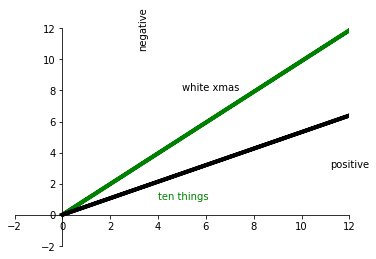

In [16]:
makeMy2Axes(xlim = (-2, 12), ylim = (-2, 12), xlabel = "positive", ylabel = "negative")
make2DVector(head = s0.reshape(2,), color = "g", lw = 4)
make2DVector(head = s1.reshape(2,), color = "k", lw = 4)
plt.annotate(text = "ten things", color = "g", xy = (4, 1) )
plt.annotate(text = "white xmas", color = "k", xy = (5, 8));

As it turns out, White Christmas is more negative-leaning than Ten Things I Hate About You! Interesting. I'm curious what the top words are from each one.

In [17]:
# sort dictionaries to extract top 10 frequencies in each movie
ten_dict = dict(ten_counts)
ten_list = sorted(ten_dict.items(), key = lambda x:x[1])
ten_sorted = dict(ten_list)

white_dict = dict(white_counts)
white_list = sorted(white_dict.items(), key = lambda x:x[1])
white_sorted = dict(white_list)

# get last 10 items of now sorted dictionaries
for x in list(reversed(list(ten_sorted)))[0:5]:
    print(x)

for x in list(reversed(list(white_sorted)))[0:5]:
    print(x)

kat
patrick
bianca
cameron
michael
bob
phil
-
betty
shot


These are all names which doesn't help a ton. Instead, I'll make a list of the top 20 words from each movie and go from there.

In [18]:
ten_highest = []
for x in list(reversed(list(ten_sorted)))[0:30]:
    ten_highest.append(x)

white_highest = []
for x in list(reversed(list(white_sorted)))[0:30]:
    white_highest.append(x)

print(ten_highest)
print(white_highest)

['kat', 'patrick', 'bianca', 'cameron', 'michael', '-', 'joey', '--', '(continuing)', 'mandella', 'walter', 'im', 'youre', 'day', 'looks', 'int', 'know', 'like', 'go', 'dont', 'night', 'back', 'get', 'door', 'miss', 'away', 'look', 'chastity', 'one', 'think']
['bob', 'phil', '-', 'betty', 'shot', 'waverly', 'judy', 'med', 'martha', 'general', 'close', 'well', 'dont', 'one', 'im', 'looks', 'get', 'see', 'going', 'susan', 'int', 'sheriff', 'room', 'thats', '(he', 'dissolve', 'number', 'know', 'inn', 'girls']


Just from these top 30 lists we can see where the negative and positive word associations come from. I blame White Christmas's gentlemanliness for the proper words that seem negative... I know Bing Crosby wouldn't do me like that!

Now that we see how positive and negative these two films are, I might be interested in the frequencies of just positive words from both movies. We can use Kmeans clustering to tell us something about the frequency of these words in each of the documents - are they similar?

In [19]:
# extract only positive words for both films
ten_pos = {key:val for key, val in ten_sorted.items() if key in posList}
white_pos = {key:val for key, val in white_sorted.items() if key in posList}

Now we have subsets of the dictionaries of positive words and their frequencies in each movie script.

Since I only want the important ones, I'll cut off the list and use just the top 30 for each and create vectors for each movie.

In [20]:
import operator

ten_pos_sub = dict(sorted(ten_pos.items(), key = operator.itemgetter(1), reverse = True)[0:30])
white_pos_sub = dict(sorted(white_pos.items(), key = operator.itemgetter(1), reverse = True)[0:30])

print(ten_pos_sub)
print(white_pos_sub)

{'like': 62, 'smile': 22, 'smiles': 21, 'well': 20, 'good': 20, 'right': 19, 'love': 13, 'beautiful': 7, 'pretty': 6, 'cool': 6, 'great': 6, 'enough': 6, 'fine': 6, 'fun': 5, 'nice': 5, 'better': 5, 'guidance': 4, 'thank': 4, 'best': 4, 'ready': 4, 'easy': 4, 'grin': 4, 'sweet': 4, 'likes': 4, 'happy': 4, 'clears': 3, 'cute': 3, 'charming': 3, 'incredibly': 3, 'precious': 3}
{'well': 51, 'like': 26, 'right': 19, 'good': 18, 'easy': 9, 'nice': 9, 'thank': 8, 'great': 8, 'fine': 8, 'love': 8, 'better': 8, 'enough': 7, 'quiet': 7, 'smiles': 7, 'warm': 6, 'pretty': 6, 'helping': 6, 'work': 5, 'progress': 4, 'lucky': 4, 'merry': 4, 'cute': 4, 'smiling': 4, 'ready': 3, 'excited': 3, 'glimmer': 3, 'applaud': 3, 'happy': 3, 'pardon': 3, 'worth': 3}


Now that we have the top words, we need vectors of just the numbers, so let's extract the values by themselves into two lists for each of the scripts.

In [21]:
ten_pos_list = list(ten_pos_sub.values())
white_pos_list = list(white_pos_sub.values())
print(ten_pos_list)
print(white_pos_list)

[62, 22, 21, 20, 20, 19, 13, 7, 6, 6, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3]
[51, 26, 19, 18, 9, 9, 8, 8, 8, 8, 8, 7, 7, 7, 6, 6, 6, 5, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3]


And now time to cluster it up!

In [22]:
df = pd.DataFrame({
    'ten': ten_pos_list,
    'white': white_pos_list
})

In [23]:
# initialize random seed and set k
np.random.seed(200)
k = 3

In [24]:
# define some centroids
centroids = {
    j+1: [np.random.randint(0, 70), np.random.randint(0, 60)]
    for j in range(k)
}

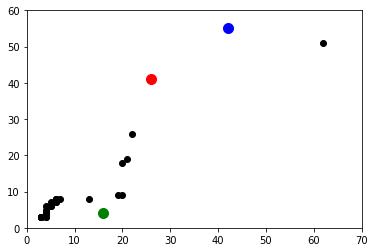

In [25]:
# plot data and (random )centroids
plt.scatter(df['ten'], df['white'], color='k')
# define a color map as a dict
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i], marker = "o", s = 100)
plt.xlim(0, 70)
plt.ylim(0, 60);

In [26]:
centroids

{1: [26, 41], 2: [16, 4], 3: [42, 55]}

We have an outlier and otherwise things are closer to the origin - let's see if we can fix it up a bit.

In [27]:
def assignment(df, centroids):
    # calc distance from every point to every centroid (vectorized by point)
    for j in centroids.keys():
        # sqrt((d - mu_{j0})^2 + (d_{2} - mu_{j1})^2)
        df['distance_from_{}'.format(j)] = (
            np.sqrt(
                (df['ten'] - centroids[j][0]) ** 2
                + (df['white'] - centroids[j][1]) ** 2
            )
        )
    # columns to work with
    centroid_distance_cols = ['distance_from_{}'.format(i) for i in centroids.keys()]
    # new column in df that holds closest centroid (min distance)
    df['closest'] = df.loc[:, centroid_distance_cols].idxmin(axis=1)
    # strip the prefix so we just have the j for closest centroid
    df['closest'] = df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    # define a cluster color, based on centroid
    df['color'] = df['closest'].map(lambda x: colmap[x])
    return df

In [28]:
df = assignment(df, centroids)
print(df.head())
print("\n\n\n")

   ten  white  distance_from_1  distance_from_2  distance_from_3  closest  \
0   62     51        37.363083        65.764732        20.396078        3   
1   22     26        15.524175        22.803509        35.227830        1   
2   21     19        22.561028        15.811388        41.677332        2   
3   20     18        23.769729        14.560220        43.046487        2   
4   20      9        32.557641         6.403124        50.990195        2   

  color  
0     b  
1     r  
2     g  
3     g  
4     g  






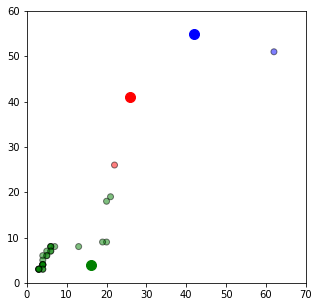

In [29]:
# visualize
fig = plt.figure(figsize=(5, 5))
# set alpha so we can tell centoid from data in cluster
plt.scatter(df['ten'], df['white'], color=df['color'], alpha=0.5, edgecolor='k')
for j in centroids.keys():
    plt.scatter(*centroids[j], color=colmap[j], marker="o", s=100)
plt.xlim(0, 70)
plt.ylim(0, 60);

It looks like one of our centroids is taking care of most of the smaller ones while the other two are stretched out beyond the main cluster. The colors help, but we might want to just ignore the outlier for now (I know, it goes against every bone in my body, but I want to see what's happening in that little cluster at the bottom!).

In [30]:
# define some more centroids
centroids = {
    j+1: [np.random.randint(0, 30), np.random.randint(0, 30)]
    for j in range(k)
}

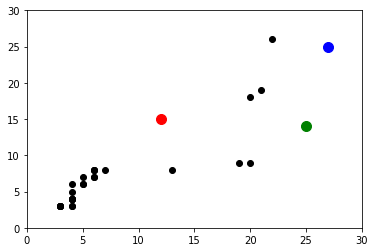

In [31]:
# plot data and (random )centroids
plt.scatter(df['ten'], df['white'], color='k')
# define a color map as a dict
colmap = {1: 'r', 2: 'g', 3: 'b'}
for i in centroids.keys():
    plt.scatter(*centroids[i], color = colmap[i], marker = "o", s = 100)
plt.xlim(0, 30)
plt.ylim(0, 30);

Now we can see the bottom group a bit clearer with some other centroids. It's interesting that we have a bit of a trend - aside form the few points headed to the east before heading north. This says with our previous observations of Ten Things I Hate About You being more positive than White Christmas - at least mathematically.

Ideally this analysis would include a multitude of movies - I would have loved to run this analysis on all of my favorite old movies, from John Wayne to Gene Kelly to the Marx Brothers. I have seen them so many times that I can guess which would be more positive and which are more similar (i.e., every Gene Kelly movie where he plays a desparate romantic, bless his heart). Even beyond positive and negative words - which have more to do with certain topics? Groucho can pretend he went to war but compare Animal Crackers to The Man Who Shot Liberty Valance and we may have ourselves a card game.

My knowledge of the math behind these concepts is much stronger than my coding abilities - something I want to keep working on, considering how much we learned in this class about Python being such a useful tool. Coming from the land of R lovers in the Stat Department made me wary of the big differences, but being able to analyze text in this way and interpret it will no doubt prove useful in my career.